In [1]:
import pandas as  pd
import numpy as np

In [2]:
df = pd.read_csv('../data/bertavivesm.20221129144401885.data.csv', delimiter=';')

In [3]:
data = df[['#time',' R1_WNAC/WdSpd.Mean',' R1_WNAC/WdDir.Mean',' R1_WTRF/TrfGriW.Mean']]
data.columns = ['time','WindSpeed','WindDirection','Power']

In [4]:
data.describe()

,WindSpeed,WindDirection,Power
count,5.230758e+06,5.230758e+06,5.230758e+06
mean,6.635825e+04,5.605512e+04,1.507089e+04
std,2.488902e+05,2.296364e+05,1.218253e+05
min,8.000000e-01,0.000000e+00,-1.682530e-01
25%,5.750000e+00,1.293000e+02,2.820310e-01
50%,9.000000e+00,2.086500e+02,1.980450e+00
75%,1.300000e+01,2.698500e+02,5.055020e+00
max,9.999993e+05,9.999993e+05,9.999993e+05


Aplicamos logaritmo para escalar los datos

In [5]:
data['WindSpeed'] = np.log(data['WindSpeed'])
data['WindDirection'] = np.log(data['WindDirection']+1) # +1 porque hay ceros
data['Power'] = np.log(data['Power'])

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/2967868636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindSpeed'] = np.log(data['WindSpeed'])
/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/2967868636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindDirection'] = np.log(data['WindDirection']+1) # +1 porque hay ceros
/Users/berta/opt/miniconda3/envs/DataScience/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value

Miramos mínimos y máximos

In [6]:
data.min()

time             2012-11-20 00:00:00
WindSpeed                  -0.223144
WindDirection                    0.0
Power                      -9.927237
dtype: object

In [10]:
data.max()

time             2017-11-20 23:59:00
WindSpeed                   13.81551
WindDirection              13.815511
Power                       13.81551
dtype: object

Comprobamos que la distribución no cambia

array([[<AxesSubplot: title={'center': 'WindSpeed'}>,
        <AxesSubplot: title={'center': 'WindDirection'}>],
       [<AxesSubplot: title={'center': 'Power'}>, <AxesSubplot: >]],
      dtype=object)

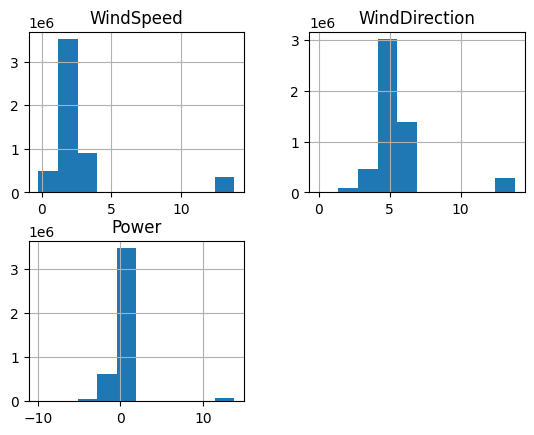

In [11]:
data.hist()

Miramos la desviación estandar

In [12]:
data.describe()

,WindSpeed,WindDirection,Power
count,5.230758e+06,5.230758e+06,4.244056e+06
mean,2.826079e+00,5.559033e+00,9.016631e-01
std,2.988140e+00,2.133192e+00,2.126445e+00
min,-2.231436e-01,0.000000e+00,-9.927237e+00
25%,1.749200e+00,4.869839e+00,9.148469e-02
50%,2.197225e+00,5.345439e+00,1.094196e+00
75%,2.564949e+00,5.601565e+00,1.635326e+00
max,1.381551e+01,1.381551e+01,1.381551e+01


Miramos los outliers en un boxplot

<AxesSubplot: >

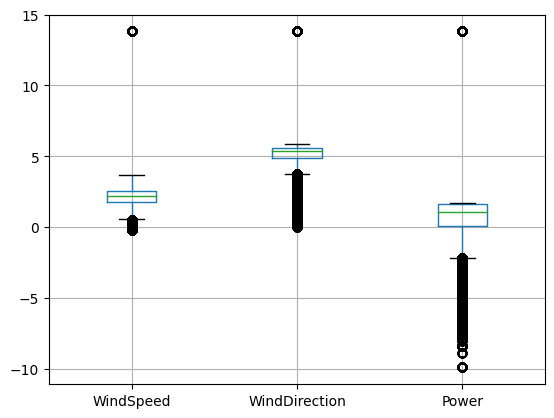

In [13]:
data.boxplot()

Tratamos los outliers

1. Calculamos por columna los rangos intercuartiles para ver que datos son outliers.
2. Imputamos los outliers a la media.

In [7]:
# WIND SPEED
Q1 = data.WindSpeed.quantile(0.25)
Q3 = data.WindSpeed.quantile(0.75)
IQR = Q3 -Q1

In [8]:
outliers_min = Q1 - 1.5 * IQR
outliers_max = Q3 + 1.5 * IQR

print(outliers_min, outliers_max)

0.5255756008308425 3.7885736114399533


In [9]:
media = data.WindSpeed.mean()
media

2.8260788001274824

In [10]:
desvest = data.WindSpeed.std()

In [12]:
min = media - desvest
max = media + desvest

print(min, max)

-0.16206161125837593 5.814219211513341


In [13]:
import random
data.WindSpeed = data.WindSpeed.apply(lambda x: random.choice(np.arange(min, max, 0.01)) if (x>outliers_max or x<outliers_min) else x)

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/497622214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.WindSpeed = data.WindSpeed.apply(lambda x: random.choice(np.arange(min, max, 0.01)) if (x>outliers_max or x<outliers_min) else x)


In [14]:
# WIND DIRECTION
Q1 = data.WindDirection.quantile(0.25)
Q3 = data.WindDirection.quantile(0.75)
IQR = Q3 -Q1

outliers_min = Q1 - 1.5 * IQR
outliers_max = Q3 + 1.5 * IQR

media = data.WindDirection.mean()
desvest = data.WindDirection.std()

min = media - desvest
max = media + desvest

data.WindDirection = data.WindDirection.apply(lambda x: random.choice(np.arange(min, max, 0.01)) if (x>outliers_max or x<outliers_min) else x)

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/2825156173.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.WindDirection = data.WindDirection.apply(lambda x: random.choice(np.arange(min, max, 0.01)) if (x>outliers_max or x<outliers_min) else x)


In [15]:
# POWER
Q1 = data.Power.quantile(0.25)
Q3 = data.Power.quantile(0.75)
IQR = Q3 -Q1

outliers_min = Q1 - 1.5 * IQR
outliers_max = Q3 + 1.5 * IQR

media = data.Power.mean()
desvest = data.Power.std()

min = media - desvest
max = media + desvest

data.Power = data.Power.apply(lambda x: random.choice(np.arange(min, max, 0.01)) if (x>outliers_max or x<outliers_min) else x)

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/1398871538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Power = data.Power.apply(lambda x: random.choice(np.arange(min, max, 0.01)) if (x>outliers_max or x<outliers_min) else x)


<AxesSubplot: >

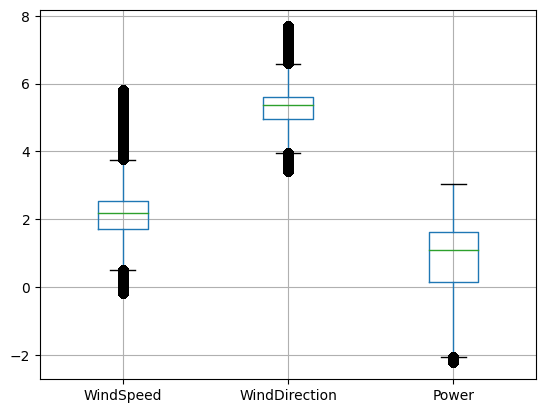

In [16]:
data.boxplot()

array([[<AxesSubplot: title={'center': 'WindSpeed'}>,
        <AxesSubplot: title={'center': 'WindDirection'}>],
       [<AxesSubplot: title={'center': 'Power'}>, <AxesSubplot: >]],
      dtype=object)

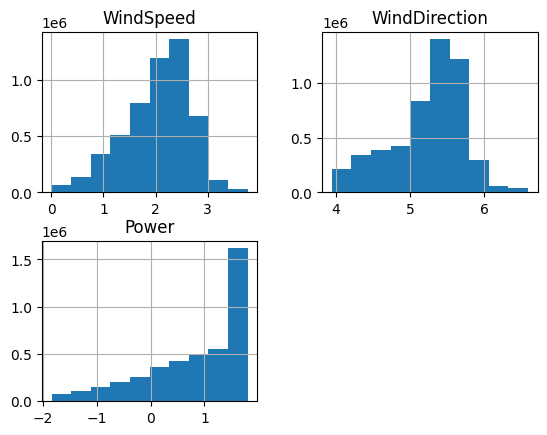

In [49]:
data.hist()

In [18]:
data['WindSpeed'] = np.exp(data['WindSpeed'])
data['WindDirection'] = np.exp(data['WindDirection']) # +1 porque hay ceros
data['Power'] = np.exp(data['Power'])

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/3083069501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindSpeed'] = np.exp(data['WindSpeed'])
/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/3083069501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindDirection'] = np.exp(data['WindDirection']) # +1 porque hay ceros
/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_43912/3083069501.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [24]:
data

,time,WindSpeed,WindDirection,Power
0,2012-11-20 00:00:00,14.90,202.80,5.16635
1,2012-11-20 00:01:00,14.90,202.80,5.15418
2,2012-11-20 00:02:00,14.70,205.10,5.13652
3,2012-11-20 00:03:00,14.30,209.50,5.02154
4,2012-11-20 00:04:00,13.45,210.65,5.09451
...,...,...,...,...
5230753,2017-11-20 23:55:00,2.95,121.45,NaN
5230754,2017-11-20 23:56:00,2.45,113.95,NaN
5230755,2017-11-20 23:57:00,1.80,108.30,NaN
5230756,2017-11-20 23:58:00,2.70,121.00,NaN


In [19]:
data.boxplot()

<AxesSubplot: >